In [4]:
import keras
keras.__version__

'2.4.3'

In [80]:
from keras import layers
from keras import models

image_size = 28 * 3
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [81]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 82, 82, 32)        320       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 39, 39, 64)        18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 17, 17, 128)       73856     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 8, 8, 128)         0         
Total params: 92,672
Trainable params: 92,672
Non-trainable params: 0
_________________________________________________

In [82]:
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [83]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 82, 82, 32)        320       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 39, 39, 64)        18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 17, 17, 128)       73856     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 8192)            

In [84]:

from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [85]:
base_dir = '/home/kazuki/Documents/myWork/DataSet/Met_Bottle_DataSet0826'

train_dir = os.path.join(base_dir, 'train_pre_resize')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')


In [93]:

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 128
train_generator = train_datagen.flow_from_directory(
    train_dir,                      # ターゲットディレクトリ
    target_size=(image_size,image_size),          # すべての画像サイズを120*40に変更
    color_mode='grayscale',     # ここを追加
    batch_size=batch_size,                  # バッチサイズ
    class_mode='binary')            # binary_crossentropyを使用するため2値のラベルが必要

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(image_size, image_size),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='binary')



Found 2646 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [87]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (128, 84, 84, 1)
labels batch shape: (128,)


In [88]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=30,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
30/30 [==============================] - 33s 1s/step - loss: 0.5208 - acc: 0.7285 - val_loss: 0.6006 - val_acc: 0.6400
Epoch 2/30
30/30 [==============================] - 33s 1s/step - loss: 0.4803 - acc: 0.7501 - val_loss: 0.6650 - val_acc: 0.5162
Epoch 3/30
30/30 [==============================] - 32s 1s/step - loss: 0.4655 - acc: 0.7612 - val_loss: 0.5672 - val_acc: 0.7050
Epoch 4/30
30/30 [==============================] - 33s 1s/step - loss: 0.4593 - acc: 0.7633 - val_loss: 0.5984 - val_acc: 0.6662
Epoch 5/30
30/30 [==============================] - 33s 1s/step - loss: 0.4432 - acc: 0.7774 - val_loss: 0.5267 - val_acc: 0.7700
Epoch 6/30
30/30 [==============================] - 34s 1s/step - loss: 0.4417 - acc: 0.7754 - val_loss: 0.5537 - val_acc: 0.6840
Epoch 7/30
30/30 [==============================] - 33s 1s/step - loss: 0.4318 - acc: 0.7854 - val_loss: 0.5363 - val_acc: 0.7500
Epoch 8/30
30/30 [==============================] - 36s 1s/step - loss: 0.4242 - acc: 0.79

In [89]:
model.save('met_bottle_model0826_v3.h5')

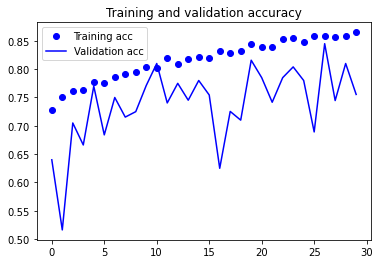

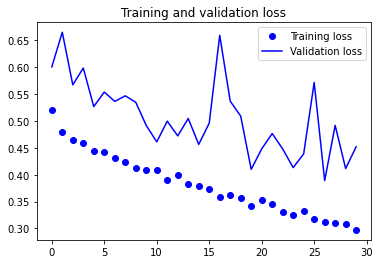

In [90]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()